In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import uproot

In [2]:
def pred_target_hists(model_path, range=[[-1,1],[-1,1]], log=False):
    predict_output_files = [file for file in
                            os.listdir(
                                os.path.join(
                                    '/users/oskar.rothbacher/CMS/ParticleNet4EFT/models/', model_path, 'predict_output'))]
    n_plots = int(np.ceil(np.sqrt(len(predict_output_files))))
    plt.subplots(figsize=[12*n_plots,10*n_plots])
    for n, file in enumerate(predict_output_files):
        with uproot.open(os.path.join('/users/oskar.rothbacher/CMS/ParticleNet4EFT/models/', model_path, 'predict_output', f'{file}:Events')) as f:
            predict = f.arrays(library='np')
            plt.subplot(n_plots, n_plots, n+1)
            hist=plt.hist2d(predict['lin_ctWRe'], predict['output'], bins=100, range=range, norm=colors.SymLogNorm(1) if log else None)
            plt.plot([-1,1],[-1,1])
            plt.colorbar()
            plt.title(file)

/tmp/ipykernel_75366/2193369697.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


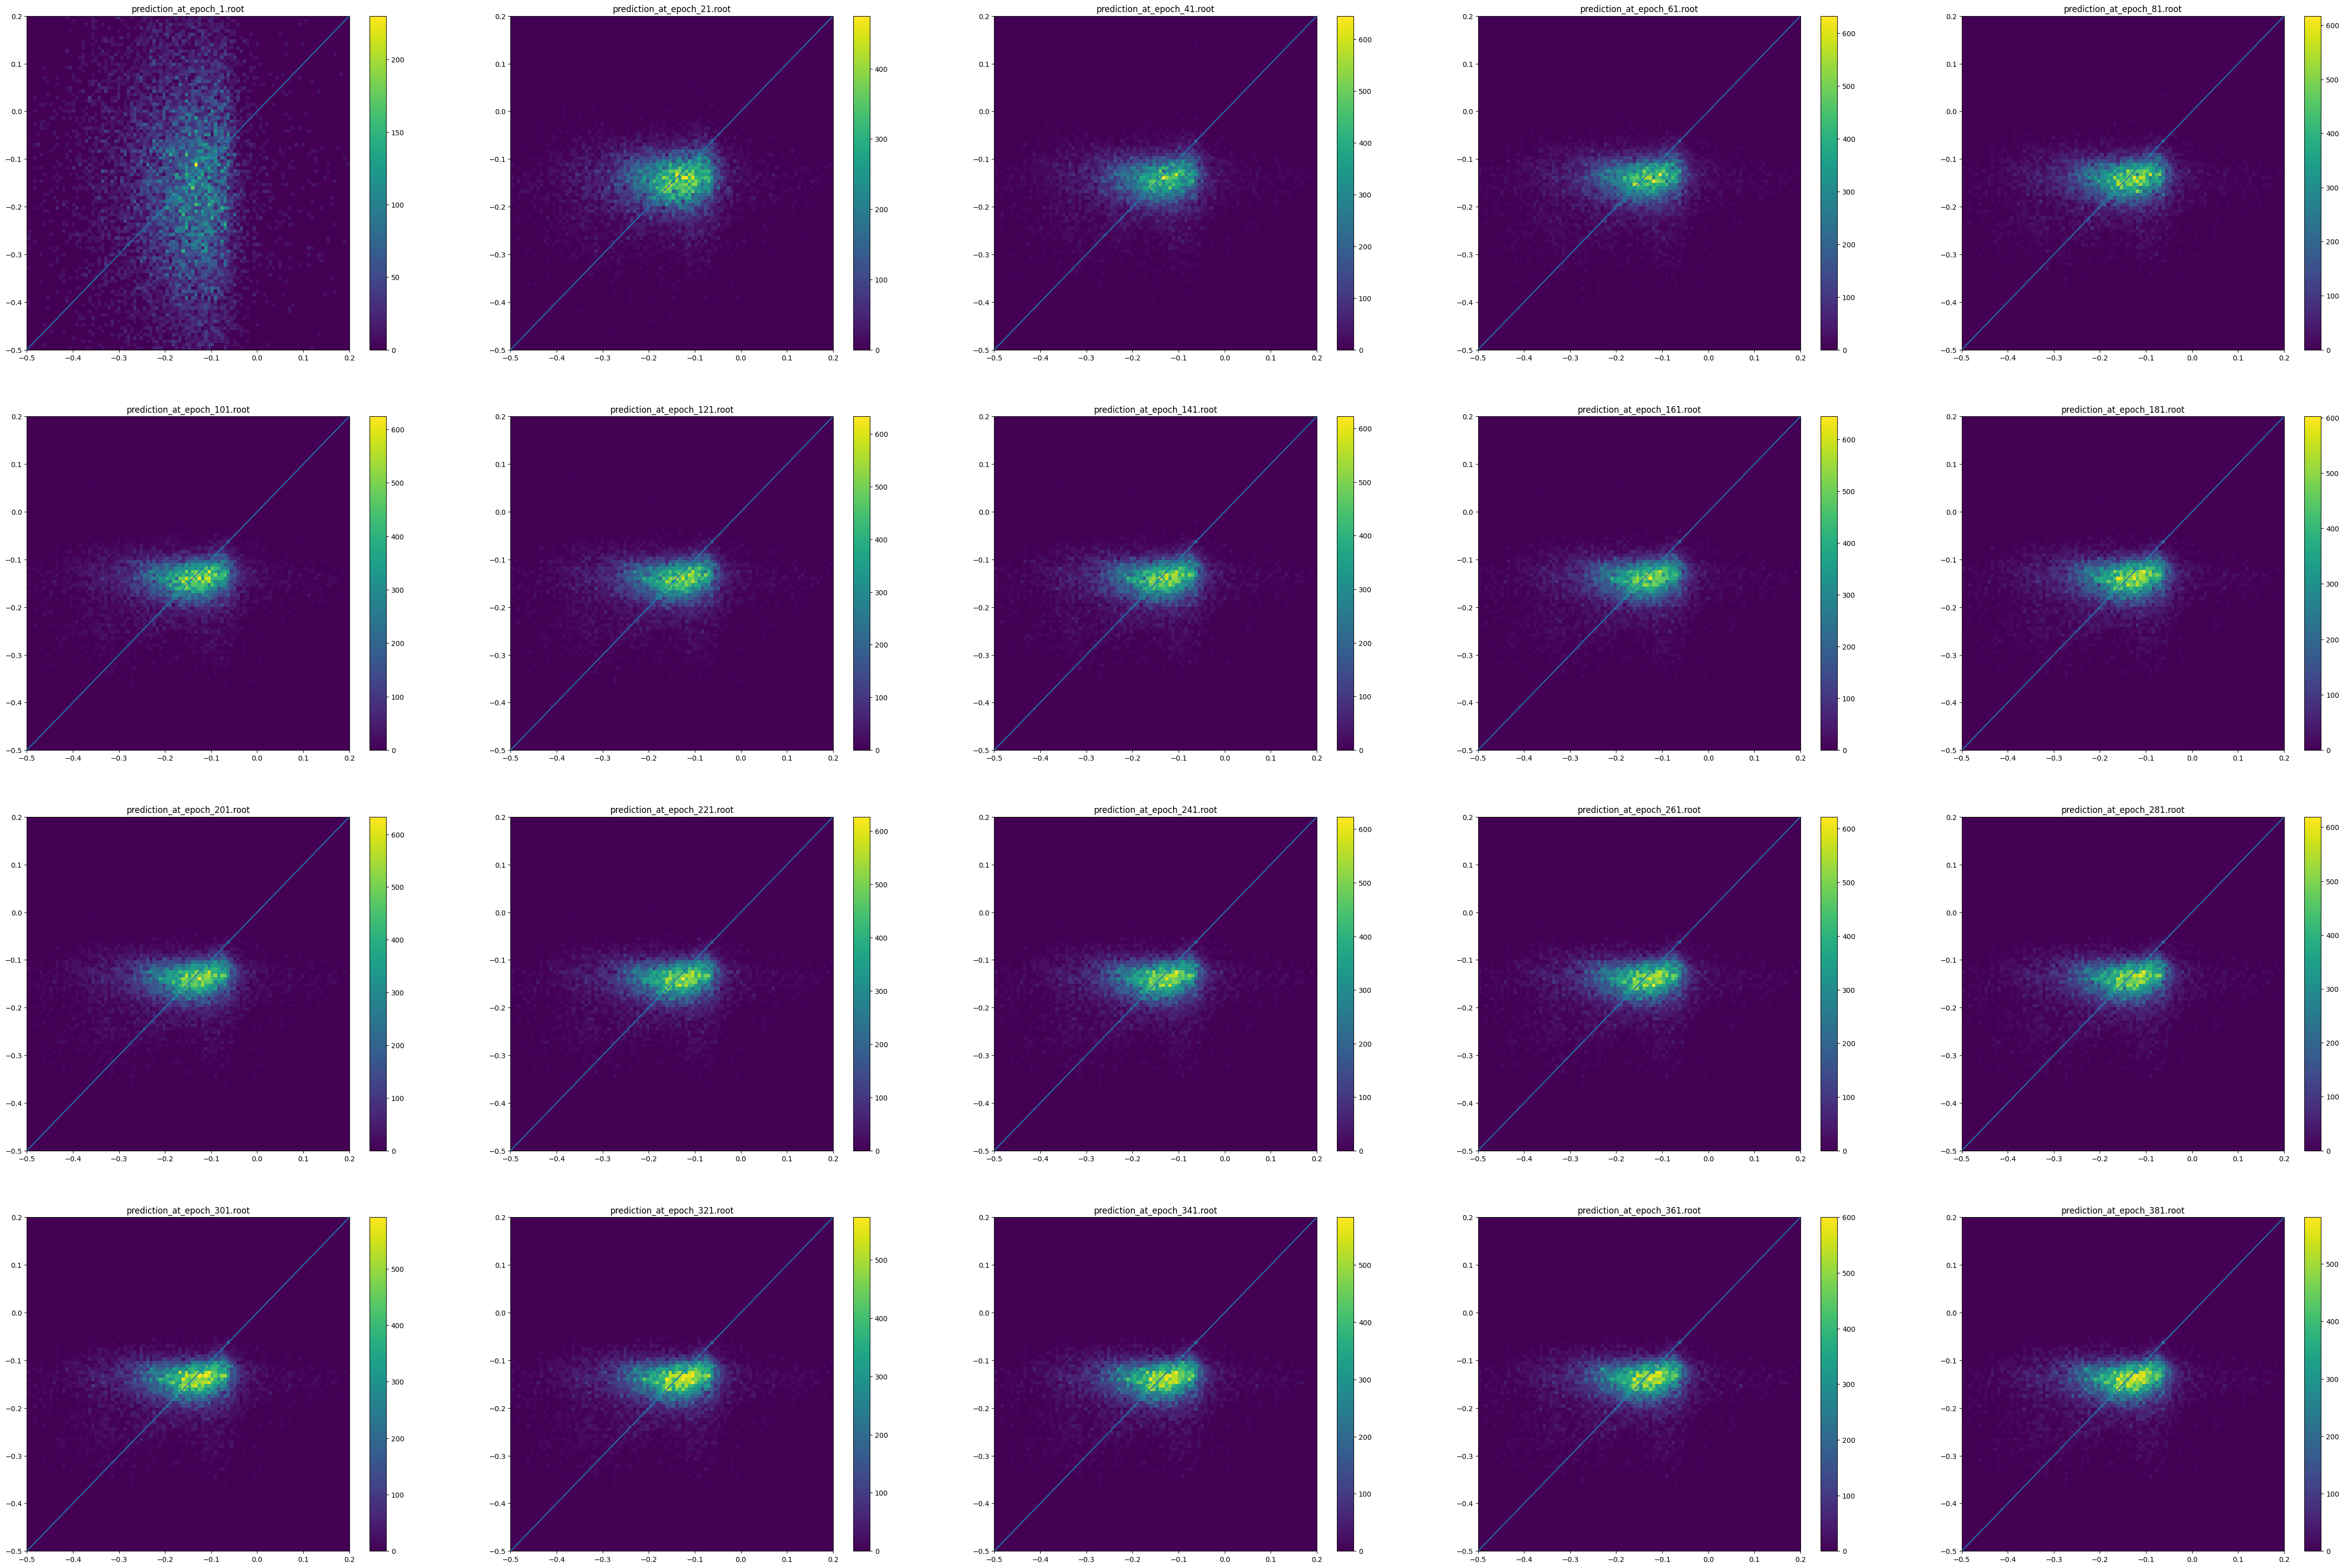

In [9]:
pred_target_hists('mlp_hl_lin_test_4', range=[[-0.5,0.2],[-0.5,0.2]], log=False)

/tmp/ipykernel_11736/2193369697.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_plots, n_plots, n+1)


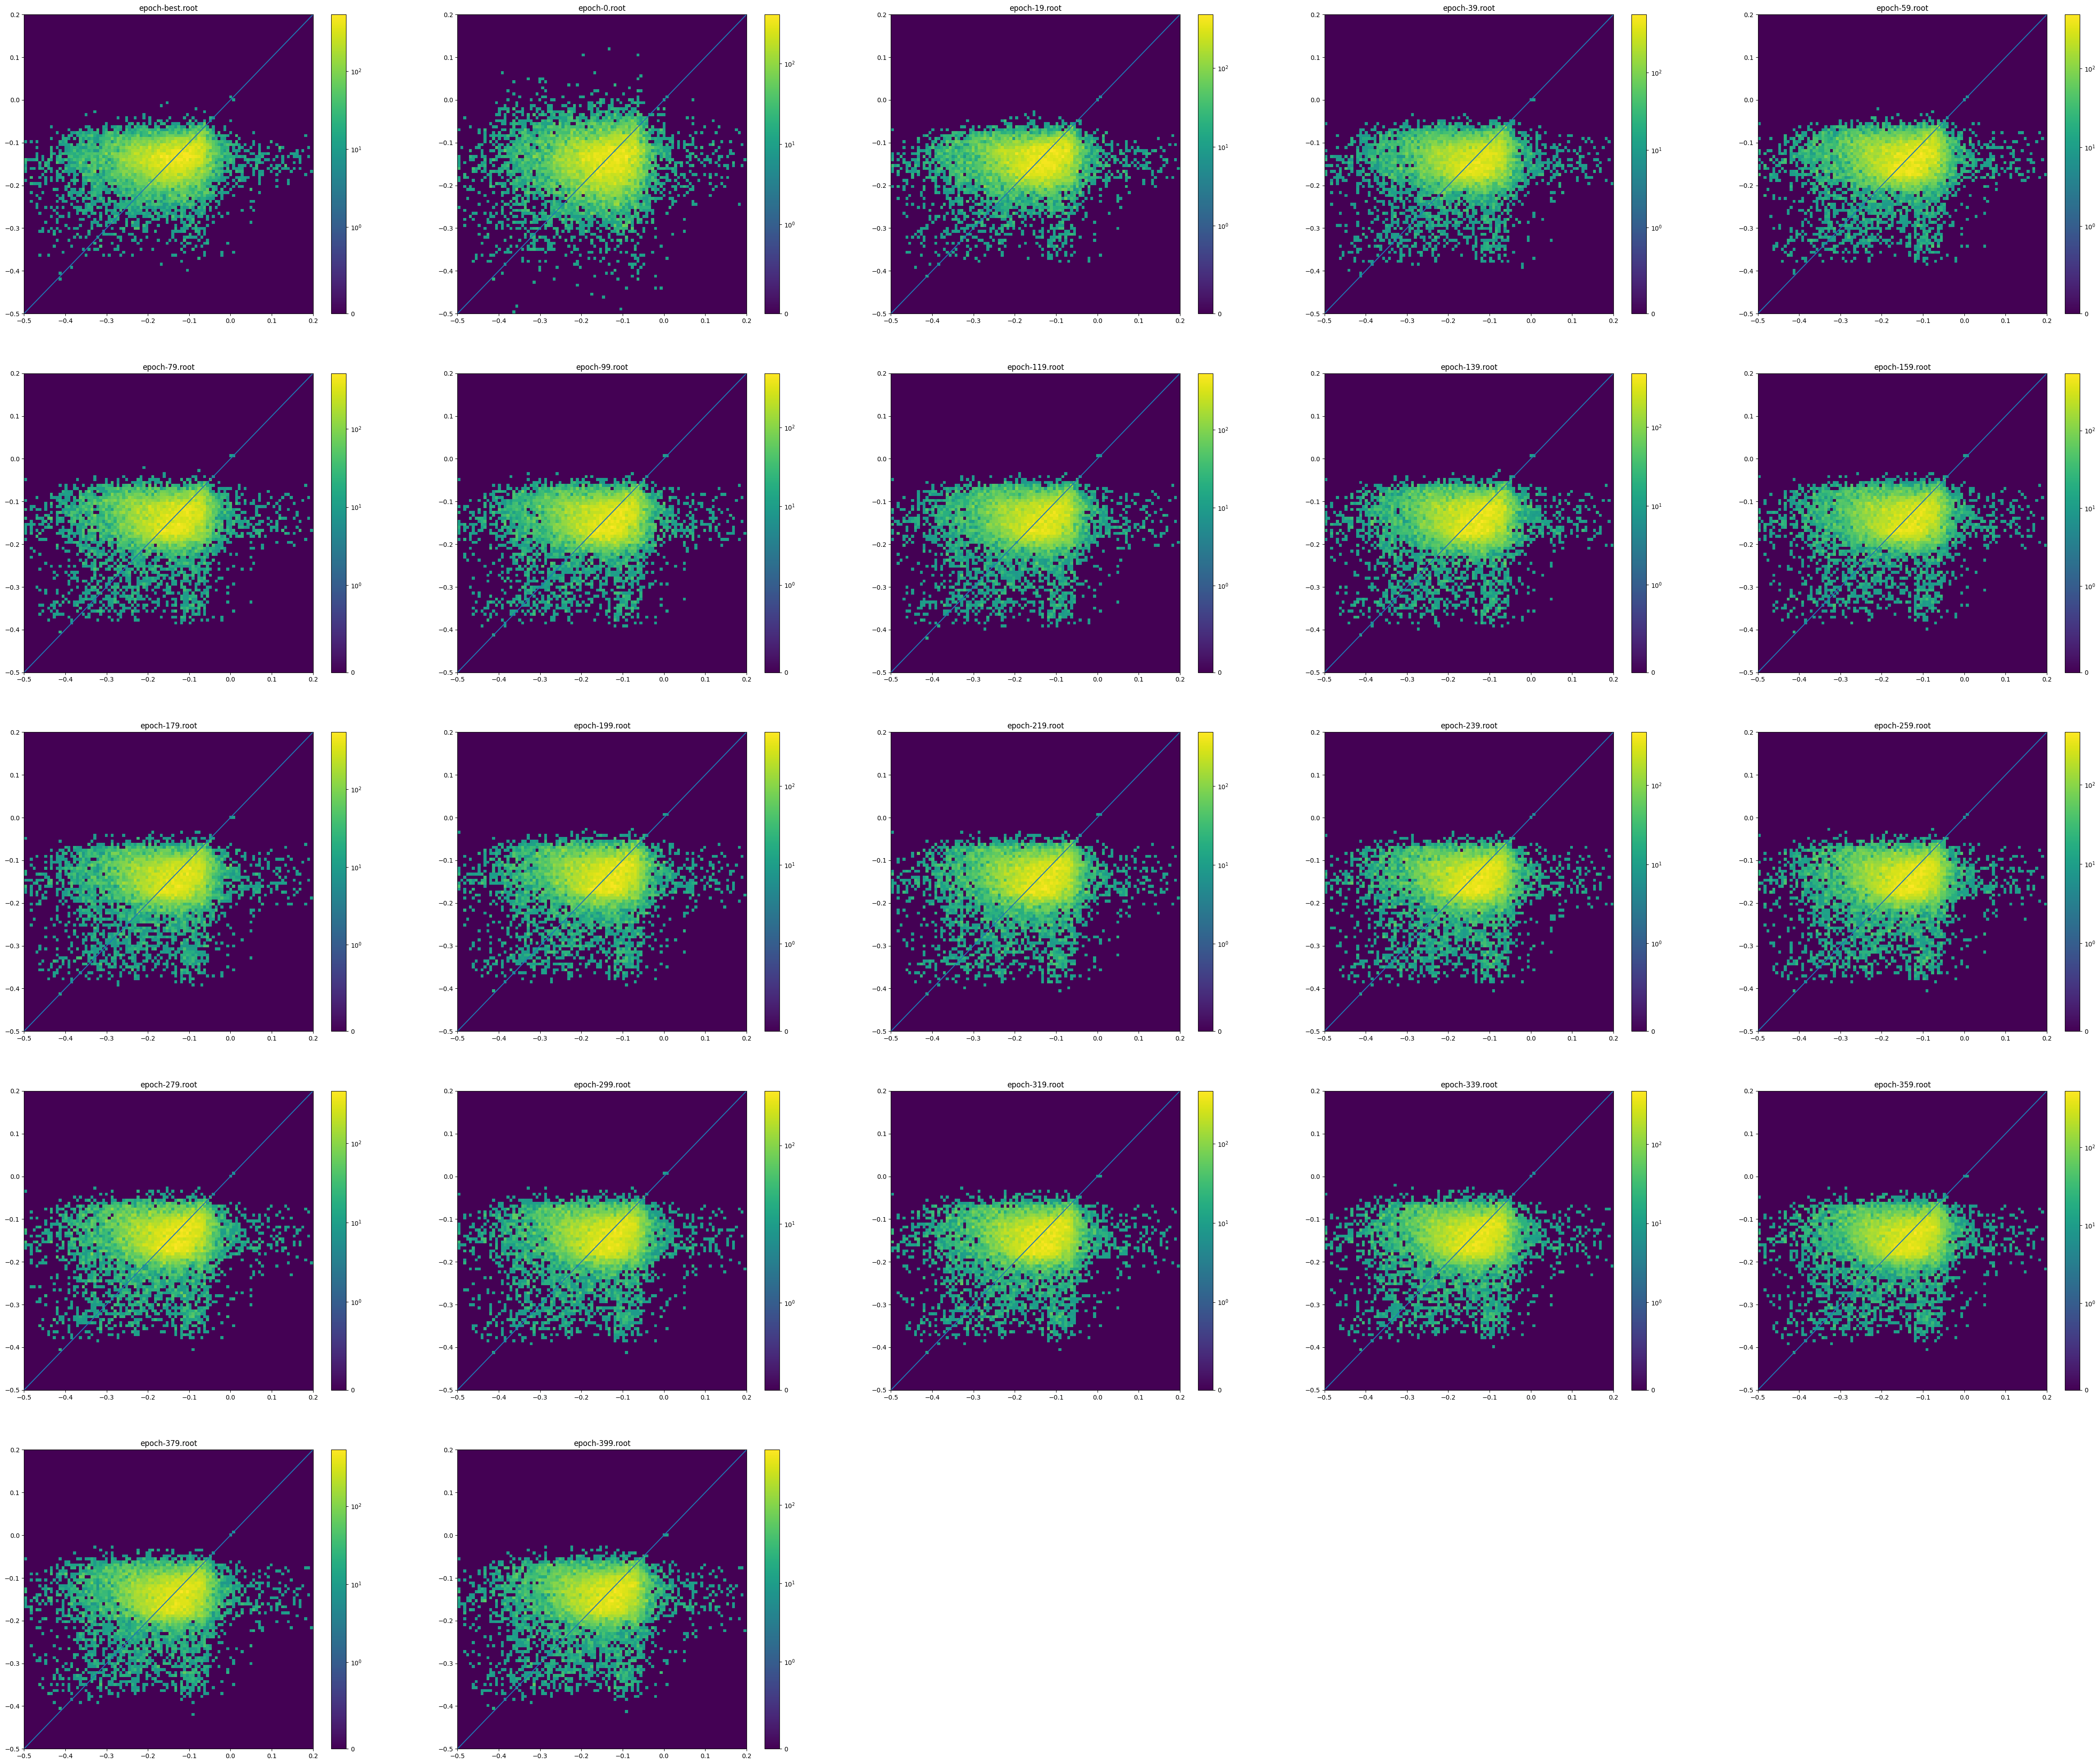

In [73]:
pred_target_hists('mlp_hl_lin_v5', range=[[-0.5,0.2],[-0.5,0.2]], log=True)